# Project: Text-to-Image Generation with Multi-Model Analysis

# Objective

Build a comprehensive pipeline that generates images from text descriptions
using Stable Diffusion, analyzes them using CLIP, and performs instance
segmentation using Meta’s Segment Anything Model 2 (SAM2). The system
must be accessible through a RESTful API and should work on either GPU or
CPU environments.

# Models Used

**Stable Diffusion:**

*   A generative model that creates detailed images from text descriptions by using latent diffusion processes.
*   It leverages neural networks trained on large datasets to produce high-quality, diverse imagery.

**Segment Anything Model 2 (SAM2):**

*  A segmentation model designed to create detailed masks for objects or regions in images, regardless of object type, based on prompt inputs or fully automated detection.
*  SAM2 excels at instance segmentation, enabling fine-grained object recognition and manipulation in computer vision applications.

**CLIP (Contrastive Language-Image Pre-training):**

*   A model that connects images and text by learning joint embeddings, allowing it to evaluate the similarity between a description and an image.
*   It is widely used for tasks like image generation evaluation, zero-shot learning, and multimodal content understanding.






Loading the required Dependies

In [1]:
!pip install streamlit
!pip install diffusers
!pip install segment-anything
!pip install transformers
!pip install torch
!pip install torchaudio
!pip install pydantic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 670.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 8.7 MB/s eta 0:00:00


# Set Up Device

In [5]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Text-to-Image Generation:

The goal is to input a text description (e.g., "a red sports car on a sunny beach") and generate a corresponding image.

Importing Required Packages

In [4]:
import torch
from transformers import CLIPProcessor, CLIPModel
from diffusers import StableDiffusionPipeline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Stable Diffusion - Generate Image from Text

Stable Diffusion is a deep learning model that generates high-quality images from text descriptions. It uses a process called "diffusion" to iteratively enhance the image from random noise, creating detailed and realistic visuals based on the input prompt.

This code loads the Stable Diffusion model and generates an image based on a given text description.

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Generating image for: A dog playing in the park


  0%|          | 0/50 [00:00<?, ?it/s]

Image generated and saved as 'generated_image.png'


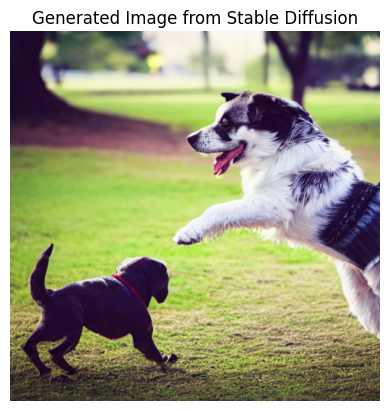

In [6]:
# Load Stable Diffusion model
def load_stable_diffusion_model():
    return StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4").to(device)

stable_diffusion = load_stable_diffusion_model()

# Input text description for image generation
text_description = "A dog playing in the park"
print(f"Generating image for: {text_description}")

# Generate image
image = stable_diffusion(text_description).images[0]
image_np = np.array(image)  # Convert to numpy array for later processing
image.save("generated_image.png")  # Save the image to verify the result
print("Image generated and saved as 'generated_image.png'")

# Display the generated image
plt.imshow(image_np)
plt.title("Generated Image from Stable Diffusion")
plt.axis('off')
plt.show()

# SAM2 - Segment the Generated Image

SAM2 is an instance segmentation model developed by Meta (Facebook). It can identify and separate different objects within an image by segmenting them into distinct regions. This is useful for understanding the structure of the generated image by isolating individual objects.

This code loads the SAM2 model, applies it to the generated image from Stable Diffusion, and overlays detected segmentation masks on the image.

# Environment Set-up

If running locally using jupyter, first install SAM 2 in your environment using the installation instructions in the repository.

If running from Google Colab, set using_colab=True below and run the cell. In Colab, be sure to select 'GPU' under 'Edit'->'Notebook Settings'->'Hardware accelerator'. Note that it's recommended to use A100 or L4 GPUs when running in Colab (T4 GPUs might also work, but could be slow and might run out of memory in some cases).

In [7]:
using_colab = True

In [8]:
if using_colab:
    import torch
    import torchvision
    print("PyTorch version:", torch.__version__)
    print("Torchvision version:", torchvision.__version__)
    print("CUDA is available:", torch.cuda.is_available())
    import sys
    !{sys.executable} -m pip install opencv-python matplotlib
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/sam2.git'

    !mkdir -p images
    !wget -P images https://raw.githubusercontent.com/facebookresearch/sam2/main/notebooks/images/cars.jpg

    !mkdir -p ../checkpoints/
    !wget -P ../checkpoints/ https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_large.pt

PyTorch version: 2.4.1+cu121
Torchvision version: 0.19.1+cu121
CUDA is available: False
  Cloning https://github.com/facebookresearch/sam2.git to /tmp/pip-req-build-9c518jqz
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/sam2.git /tmp/pip-req-build-9c518jqz
  Resolved https://github.com/facebookresearch/sam2.git to commit c2ec8e14a185632b0a5d8b161928ceb50197eddc
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.3 MB/s eta 0:00:00
  Created wheel for SAM-2: filename=SAM_2-1.0-cp310-cp

In [9]:
import os
# if using Apple MPS, fall back to CPU for unsupported ops
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

In [10]:
# select the device for computation
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print(f"using device: {device}")

if device.type == "cuda":
    # use bfloat16 for the entire notebook
    torch.autocast("cuda", dtype=torch.bfloat16).__enter__()
    # turn on tfloat32 for Ampere GPUs (https://pytorch.org/docs/stable/notes/cuda.html#tensorfloat-32-tf32-on-ampere-devices)
    if torch.cuda.get_device_properties(0).major >= 8:
        torch.backends.cuda.matmul.allow_tf32 = True
        torch.backends.cudnn.allow_tf32 = True
elif device.type == "mps":
    print(
        "\nSupport for MPS devices is preliminary. SAM 2 is trained with CUDA and might "
        "give numerically different outputs and sometimes degraded performance on MPS. "
        "See e.g. https://github.com/pytorch/pytorch/issues/84936 for a discussion."
    )

using device: cpu


# Generated Image

In [11]:
image = Image.open('generated_image.png')
image = np.array(image.convert("RGB"))

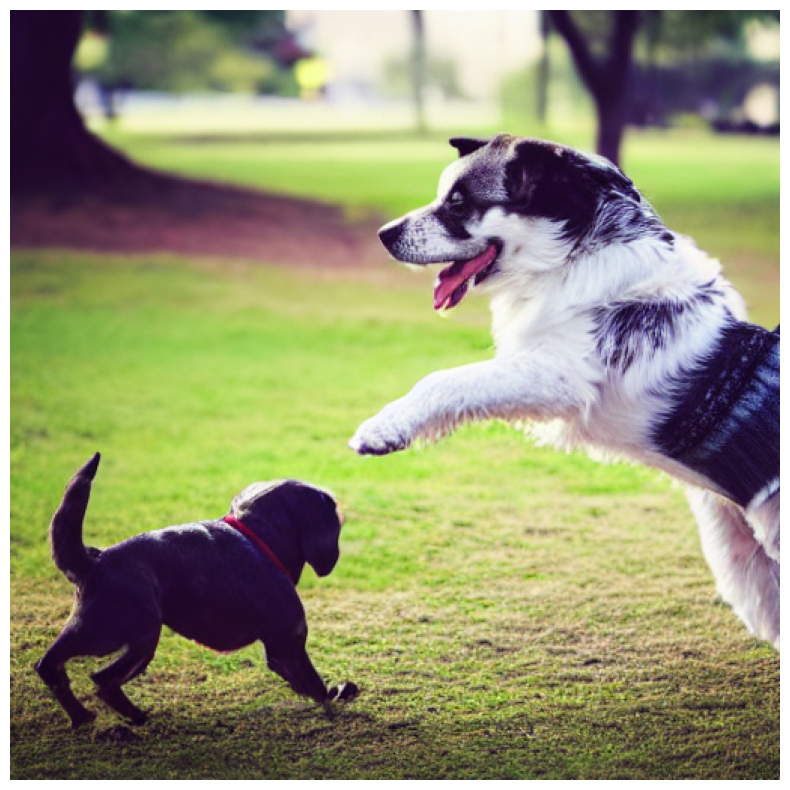

In [19]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

# Automatic Mask Generation

To run automatic mask generation, provide a version of SAM 2 to the SAM2AutomaticMaskGenerator class. Set the path below to the SAM 2 checkpoint.

In [14]:
from sam2.build_sam import build_sam2
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator

# Load SAM2 model
def load_sam2_model():
    # Update with correct paths to your SAM2 checkpoint and configuration
    sam2_checkpoint = "../checkpoints/sam2.1_hiera_large.pt"
    model_cfg = "configs/sam2.1/sam2.1_hiera_l.yaml"
    return build_sam2(model_cfg, sam2_checkpoint, device=device, apply_postprocessing=False)

sam2_model = load_sam2_model()
mask_generator = SAM2AutomaticMaskGenerator(sam2_model)

# Generate masks for the generated image
masks = mask_generator.generate(image_np)   #To generate masks, just run generate on an image.
print(f"Number of masks detected: {len(masks)}")


Number of masks detected: 16


In [15]:
# Display segmented image with masks
print(masks[0].keys())

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


Mask generation returns a list over masks, where each mask is a dictionary containing various data about the mask. These keys are:




*   segmentation : the mask
*   area : the area of the mask in pixels
*  bbox : the boundary box of the mask in XYWH format
*  predicted_iou : the model's own prediction for the quality of the mask
*   point_coords : the sampled input point that generated this mask
*   stability_score : an additional measure of mask quality
*   crop_box : the crop of the image used to generate this mask in XYWH format















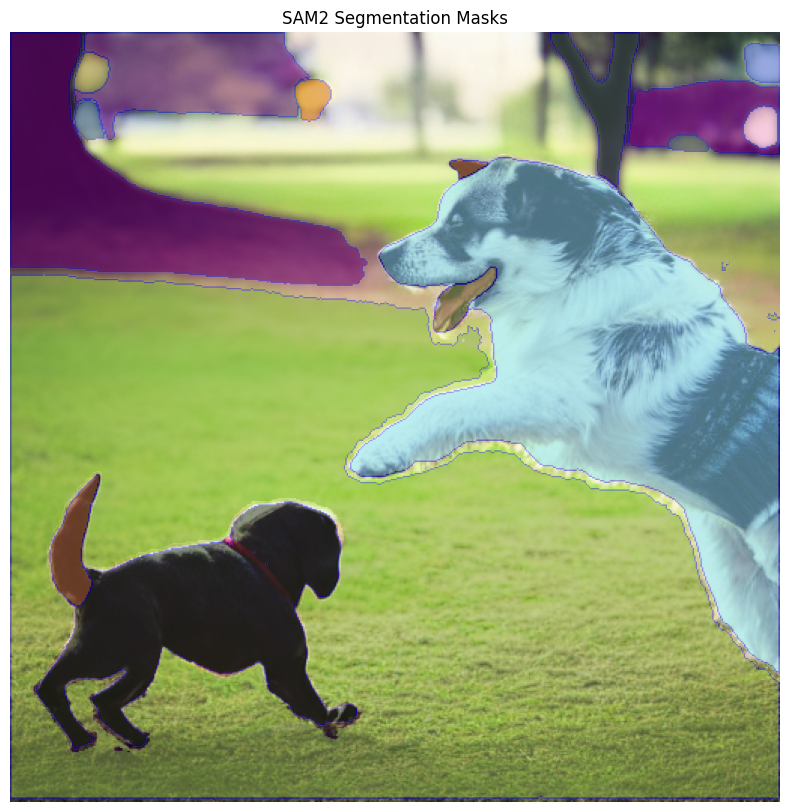

In [27]:
# Plot the original image with masks
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image_np)

np.random.seed(3)

def show_anns(anns, borders=True):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:, :, 3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.5]])
        img[m] = color_mask
        if borders:
            import cv2
            contours, _ = cv2.findContours(m.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            # Try to smooth contours
            contours = [cv2.approxPolyDP(contour, epsilon=0.01, closed=True) for contour in contours]
            cv2.drawContours(img, contours, -1, (0, 0, 1, 0.4), thickness=1)

    ax.imshow(img)

show_anns(masks, ax)
ax.axis('off')
plt.title("SAM2 Segmentation Masks")
plt.show()

# CLIP(Contrastive Language-Image Pretraining) - Analyze the Image-Text Similarity

CLIP is a model that links images and text by learning to understand how textual descriptions correspond to visual representations. In your pipeline, CLIP can be used to assess how well the generated images match the original text by analyzing the semantic content of both.

This code loads the CLIP model, processes the generated image and input text, and outputs a similarity score indicating how well the image matches the text description.

In [28]:
from transformers import CLIPProcessor, CLIPModel

# Load CLIP model and processor
def load_clip_model():
    return CLIPModel.from_pretrained("openai/clip-vit-base-patch32"), CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

clip_model, clip_processor = load_clip_model()

# Process image and text for CLIP similarity score
inputs = clip_processor(text=[text_description], images=image, return_tensors="pt", padding=True).to(device)
outputs = clip_model(**inputs)

# Retrieve similarity score
logits_per_image = outputs.logits_per_image
similarity_score = logits_per_image.item()
print(f"CLIP Similarity Score: {similarity_score:.4f}")

# Summary Output
print("\nSummary:")
print(f"Text description: {text_description}")
print(f"Generated Image saved as 'generated_image.png'")
print(f"Number of detected masks: {len(masks)}")
print(f"CLIP Similarity Score: {similarity_score:.4f}")


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

CLIP Similarity Score: 27.9867

Summary:
Text description: A dog playing in the park
Generated Image saved as 'generated_image.png'
Number of detected masks: 16
CLIP Similarity Score: 27.9867


# CLIP Score Range:






Theoretical Range: The dot product for similarity scores can vary
significantly depending on the model and scaling factors, but generally:
*   Negative Values: If the score is negative, it means that the text and image are dissimilar (the embeddings are pointing in opposite directions).
*   Zero Value: A score close to zero indicates that there is no particular relationship between the image and text (orthogonal embeddings).
*   Positive Values: The higher the positive score, the better the alignment between the image and text description.

However, the actual range of values (how high or low) can vary depending on how your CLIP model is trained and the types of tasks it's evaluated on. Most commonly, similarity scores will range between 0 and some positive value (e.g., 100 or more), depending on the scale of embeddings used by the CLIP model.

# Conclusion:

For our case, a CLIP similarity score of 27.9867 suggests a moderate alignment between the text description and the image. While this is not a bad score, it may not reflect the best match either. we might aim for scores above 40 for better alignment, and scores below 20 might indicate significant discrepancies between the text and the image.

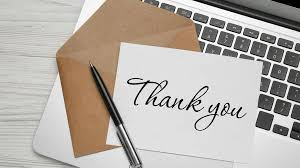